*This notebook was created and implemented in Google Colab*

## Import & Read Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd 'drive/MyDrive/TikTok Hackathon'

/content/drive/MyDrive/TikTok Hackathon


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
ads = pd.read_excel("Dataset.xlsx", skiprows=1, sheet_name=0)     #read first sheet
rev = pd.read_excel("Dataset.xlsx", sheet_name=1)                 #read second sheet

## Ads Dataset

This is the ads dataset from the first sheet

In [11]:
ads

,p_date,ad_id,delivery_country,queue_market,punish_num,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en
0,20230807,1747578422390810,US,USCA,1.0,2023-07-24,5132.1700,4795.250,2022-10-24 14:36:00,1.78,Auction Ads,auction_relation
1,20230807,1758543228094480,SA,MENA,1.0,2023-06-14,1976.2500,1063.767,2023-02-22 15:50:00,1.67,RIE,Ad Group Recall (Merged)
2,20230807,1738303151826990,AU,AU,2.0,2023-07-24,1.7355,5.365,2022-07-14 05:00:00,1.84,Auction Ads,auction_relation
3,20230807,1738303920938010,NZ,NZ,2.0,2023-07-24,NaN,5.365,2022-07-14 05:16:00,1.58,Auction Ads,auction_relation
4,20230807,1738304016410620,NZ,NZ,2.0,2023-07-24,1.5250,5.365,2022-07-14 05:17:00,1.58,Auction Ads,auction_relation
...,...,...,...,...,...,...,...,...,...,...,...,...
40674,20230807,1773472206047230,VN,NaN,NaN,2000-01-01,NaN,0.000,NaT,0.54,Non-Auction Ads,Promote
40675,20230807,1773607712030720,BR,NaN,NaN,2000-01-01,NaN,0.000,NaT,0.54,Non-Auction Ads,Promote
40676,20230807,1773589699308540,BE,NaN,NaN,2000-01-01,NaN,0.000,NaT,0.54,Non-Auction Ads,Promote
40677,20230807,1773530511220730,TR,NaN,NaN,2000-01-01,NaN,0.000,NaT,0.54,Non-Auction Ads,Promote


In [ ]:
len(ads)      #total number of ads

40679

### Data Types

We do a check of the data types, the date columns must be of datetime

In [12]:
ads.dtypes

p_date                               int64
ad_id                                int64
delivery_country                    object
queue_market                        object
punish_num                         float64
latest_punish_begin_date    datetime64[ns]
ad_revenue                         float64
avg_ad_revenue                     float64
start_time                  datetime64[ns]
baseline_st                        float64
product_line                        object
task_type_en                        object
dtype: object

The p_date must also be a datetime column

In [13]:
ads['p_date'] = pd.to_datetime(ads['p_date'].astype(str))

All other columns seem have the desired datatype

### Column Checks

We will now do some basic checks of values and/or distribution for each of the columns. Hence, this won't be useful in priority scoring/optimization

#### Date

All ads are created/launched on the same date.

In [ ]:
ads['p_date'].nunique()

1

In [ ]:
ads['p_date'].unique()      ##all ads created on the same date -- 7 Aug 2023

array([20230807])

In [ ]:
ads['p_date'].isna().sum()    #all ad campaigns have date & no NA values

0

#### Ad ID

All ad campaigns have an Ad ID, however, not all of them are unique as they may belong to the same group

In [ ]:
ads['ad_id'].nunique()

35829

In [16]:
ads['ad_id'].nunique() < len(ads)     ##more than 1 requests for the same ad group

True

In [ ]:
ads['ad_id'].isna().sum()   #all ad requests have ad id

0

Let's see how often are ad IDs repeated

In [21]:
ads['ad_id'].value_counts()

1773564011076700    46
1773572194078750    41
1773529954701310    40
1767594840576010    39
1773207852741640    39
                    ..
1773474586502170     1
1773473826382850     1
1773473862328320     1
1773473961819150     1
1773608138524670     1
Name: ad_id, Length: 35829, dtype: int64

There is only 1 campaign in the given day from most ad IDs

In [34]:
sum(ads['ad_id'].value_counts() != 1)

2022

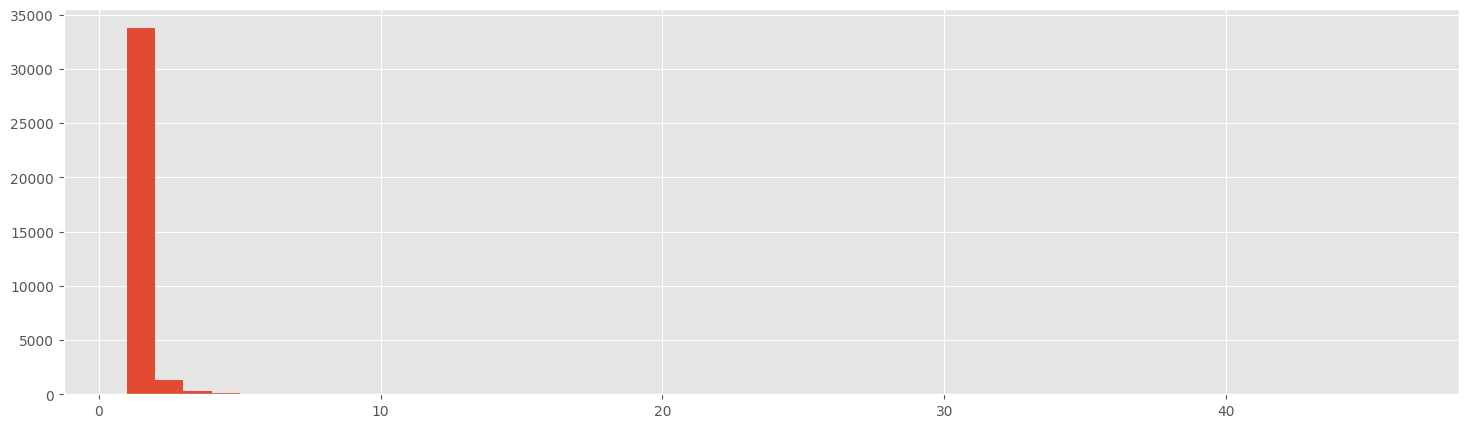

In [32]:
plt.style.use('ggplot')
plt.figure(figsize=(18, 5))
_ = plt.hist(ads['ad_id'].value_counts(), bins = 45)

In [33]:
ads['ad_id'].value_counts().value_counts()

1     33807
2      1344
3       270
4       124
5        67
6        61
8        27
7        24
9        16
10       15
11        8
12        7
16        7
13        6
15        6
23        5
17        3
14        3
18        3
31        3
21        3
22        2
39        2
26        2
28        2
37        2
34        1
40        1
36        1
41        1
33        1
32        1
19        1
24        1
20        1
46        1
Name: ad_id, dtype: int64

Ad IDs with more than one campaign request is also found to have fewer punishment numbers and a more spread average ad revenue, as compared to all ads (as seen in later sections of 'Punish Num' and 'Average Ad Revenue' histograms)

In [36]:
ads[ads['ad_id'] == 1773564011076700]   ##ad_id with the most requests

,p_date,ad_id,delivery_country,queue_market,punish_num,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en
26149,2023-08-07,1773564011076700,NO,Others,NaN,2000-01-01,13.2,2.5672,2023-08-07 09:55:00,1.56,Auction Ads,auction_all
26150,2023-08-07,1773564011076700,US,USCA,NaN,2000-01-01,13.2,2.5672,2023-08-07 09:55:00,1.78,Auction Ads,auction_relation
26151,2023-08-07,1773564011076700,DK,DK,NaN,2000-01-01,13.2,2.5672,2023-08-07 09:55:00,1.31,Auction Ads,auction_relation
26152,2023-08-07,1773564011076700,CZ,CZ,NaN,2000-01-01,13.2,2.5672,2023-08-07 09:55:00,1.90,Auction Ads,auction_relation
26153,2023-08-07,1773564011076700,IL,IL,NaN,2000-01-01,13.2,2.5672,2023-08-07 09:55:00,1.52,Auction Ads,auction_relation
26154,2023-08-07,1773564011076700,EC,Others,NaN,2000-01-01,13.2,2.5672,2023-08-07 09:55:00,1.56,Auction Ads,auction_all
26155,2023-08-07,1773564011076700,AR,AR,NaN,2000-01-01,13.2,2.5672,2023-08-07 09:55:00,2.23,Auction Ads,auction_all
26156,2023-08-07,1773564011076700,KH,KH,NaN,2000-01-01,13.2,2.5672,2023-08-07 09:55:00,1.50,Auction Ads,auction_relation
26157,2023-08-07,1773564011076700,JO,Others,NaN,2000-01-01,13.2,2.5672,2023-08-07 09:55:00,1.56,Auction Ads,auction_all
26158,2023-08-07,1773564011076700,EG,MENA,NaN,2000-01-01,13.2,2.5672,2023-08-07 09:55:00,1.78,Auction Ads,auction_relation


The punishment number of Ad Ids

In [48]:
ad_id_counts = ads['ad_id'].value_counts()

non_unique = ad_id_counts[ad_id_counts > 1].index   #only 1 count

ads.loc[ads['ad_id'].isin(non_unique)]['punish_num'].value_counts()   #max of 2 punishments only


1.0    584
2.0     50
Name: punish_num, dtype: int64

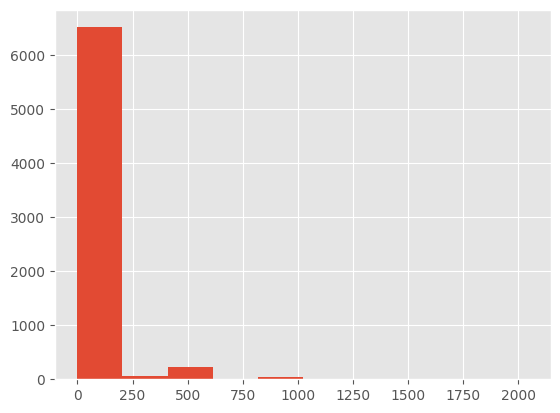

In [49]:
_ = plt.hist(ads.loc[ads['ad_id'].isin(non_unique)]['avg_ad_revenue'])      #not necessarily high revenues, but have more spread out avg revenues

#### Delivery Country

There are a few unique delivery countries for all ads

In [ ]:
ads['delivery_country'].nunique()

59

In [ ]:
ads['delivery_country'].isna().sum()

0

A bar chart of the delivery countries

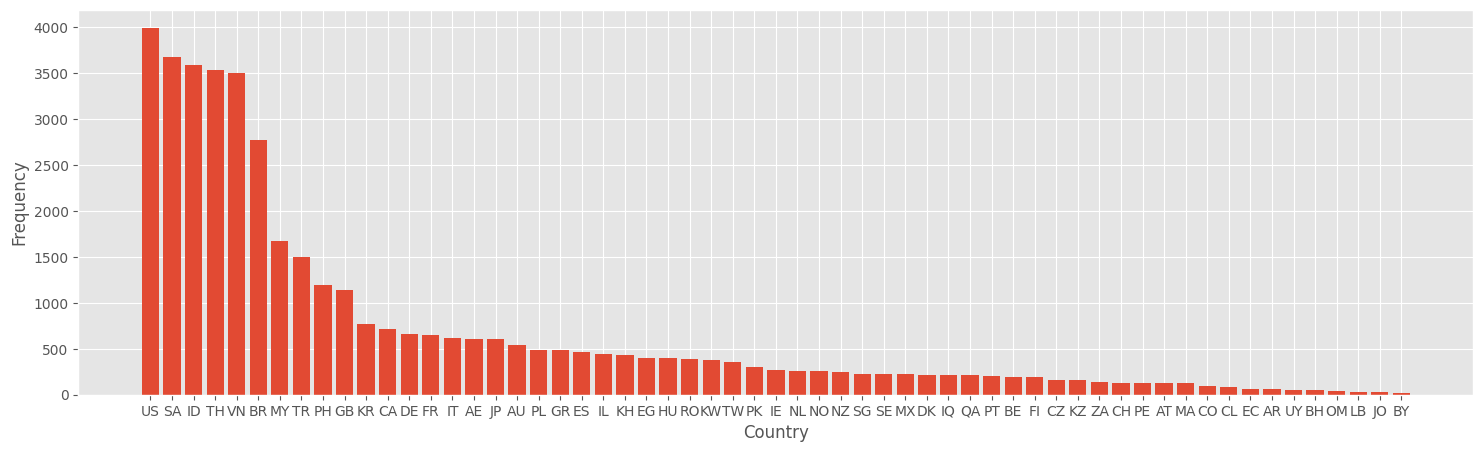

In [ ]:
plt.style.use('ggplot')
country_counts = ads['delivery_country'].value_counts().sort_values(ascending = False)

plt.figure(figsize=(18, 5))
plt.bar(country_counts.index, country_counts.values)
plt.xlabel('Country')
plt.ylabel('Frequency')
_ = plt.show()

US, SA, ID, TH, VN, and BR have the highest frequencies.

#### Queue Market

In [50]:
ads['queue_market'].nunique()

51

Not sure why queue_market are NA for significantly many ads

In [ ]:
ads[ads['queue_market'].isna()]     ## why many NAs??, some countries not for a particular region? or an ad

,p_date,ad_id,delivery_country,queue_market,punish_num,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en
322,2023-08-07,1772993446242300,PT,NaN,1.0,2023-07-14,2.1015,2.3399,2023-08-01 02:52:00,0.54,Non-Auction Ads,Promote
325,2023-08-07,1773011982034940,RO,NaN,1.0,2023-07-26,0.7434,0.6874,2023-08-01 07:49:00,0.54,Non-Auction Ads,Promote
353,2023-08-07,1773102604812280,SG,NaN,1.0,2023-05-24,8.1522,3.7608,2023-08-02 07:48:00,1.53,RIE,Promote Report Recall
380,2023-08-07,1773171876882430,MY,NaN,1.0,2023-06-25,5.1131,3.4041,2023-08-03 02:08:00,0.54,Non-Auction Ads,Promote
381,2023-08-07,1773171876882430,MY,NaN,1.0,2023-06-25,5.1131,3.4041,2023-08-03 02:08:00,0.54,Non-Auction Ads,Promote
...,...,...,...,...,...,...,...,...,...,...,...,...
40674,2023-08-07,1773472206047230,VN,NaN,NaN,2000-01-01,NaN,0.0000,NaT,0.54,Non-Auction Ads,Promote
40675,2023-08-07,1773607712030720,BR,NaN,NaN,2000-01-01,NaN,0.0000,NaT,0.54,Non-Auction Ads,Promote
40676,2023-08-07,1773589699308540,BE,NaN,NaN,2000-01-01,NaN,0.0000,NaT,0.54,Non-Auction Ads,Promote
40677,2023-08-07,1773530511220730,TR,NaN,NaN,2000-01-01,NaN,0.0000,NaT,0.54,Non-Auction Ads,Promote


In [ ]:
ads['queue_market'] = ads['queue_market'].replace('Other', 'Others')    #make Others and Other fall in the same group

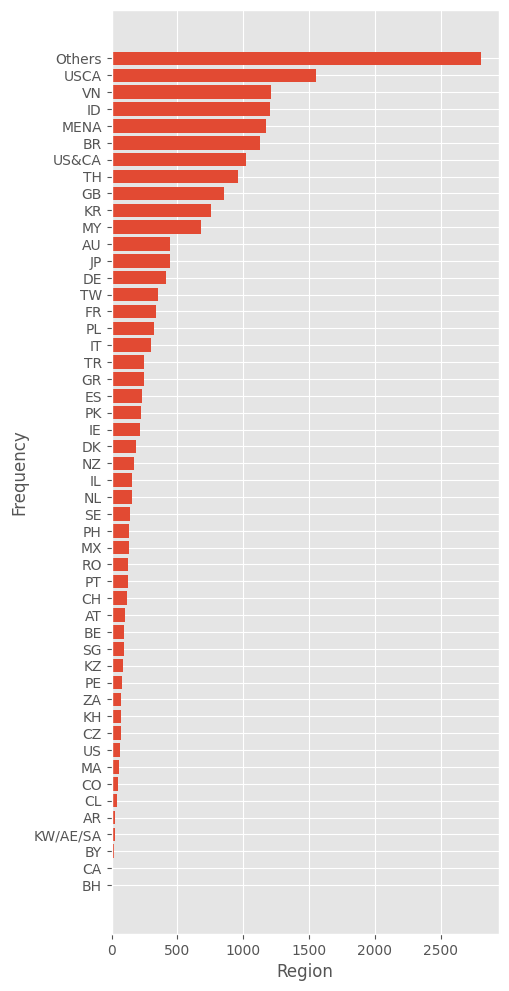

In [ ]:
plt.style.use('ggplot')

region_counts = ads.dropna(subset=['queue_market'])['queue_market'].value_counts().sort_values()

plt.figure(figsize=(5, 12))
plt.barh(region_counts.index, region_counts.values)
plt.xlabel('Region')
plt.ylabel('Frequency')
_ = plt.show()

Most ads are from Others, then the rest of the region seem to reflect the higher frequency ones from Delivery Country

#### Punish Num

Ad campaigns/requests with no punishments in last 30 days are recorded as NA, we must convert them to 0.

In [ ]:
ads['punish_num'].isna().sum()

38286

In [ ]:
ads[ads['punish_num'] == 0]     ## NA = 0

,p_date,ad_id,delivery_country,queue_market,punish_num,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en


In [ ]:
ads[(ads['punish_num'].isna()) & (ads['latest_punish_begin_date'] > "2000-01-01")]

In [ ]:
ads['punish_num'] = ads['punish_num'].fillna(0)

In [ ]:
ads['punish_num'].isna().sum()

0

In [ ]:
sum(ads['punish_num'] == 0)

38286

Most ads have no punishments

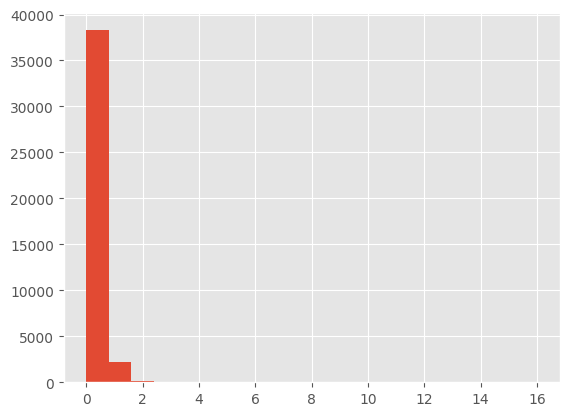

In [ ]:
_ = plt.hist(ads['punish_num'], bins = 20)

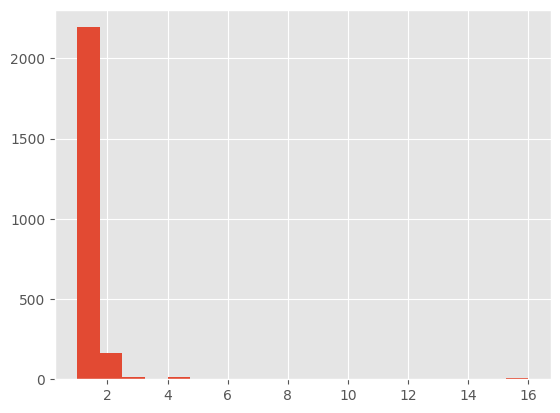

In [ ]:
_ = plt.hist(ads[ads['punish_num'] > 0]['punish_num'], bins = 20)

Relatively few ads have punishments over 2 and with few outliers towards the extreme.

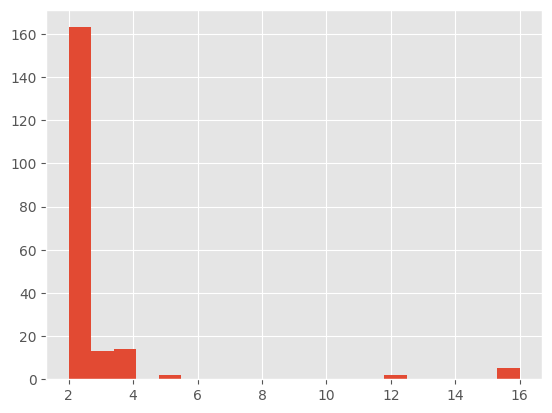

In [ ]:
_ = plt.hist(ads[ads['punish_num'] > 1]['punish_num'], bins = 20)

#### Latest Punish Begin Date

Since most ads have 0 punishments, the latest punish begin dates are also in 2000-01-01

In [ ]:
ads['latest_punish_begin_date']

0       2023-07-24
1       2023-06-14
2       2023-07-24
3       2023-07-24
4       2023-07-24
           ...    
40674   2000-01-01
40675   2000-01-01
40676   2000-01-01
40677   2000-01-01
40678   2000-01-01
Name: latest_punish_begin_date, Length: 40679, dtype: datetime64[ns]

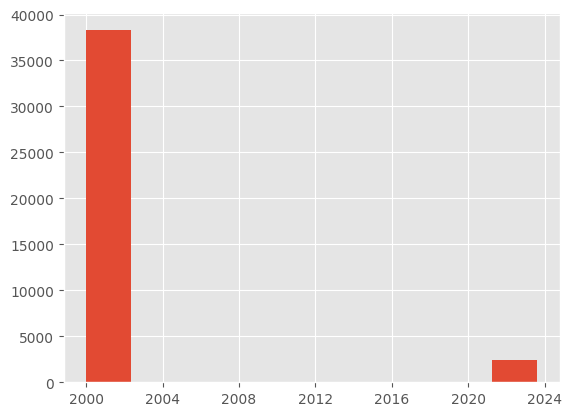

In [ ]:
_ = plt.hist(ads['latest_punish_begin_date'])

For ads with past punishments, most of them are more recent.

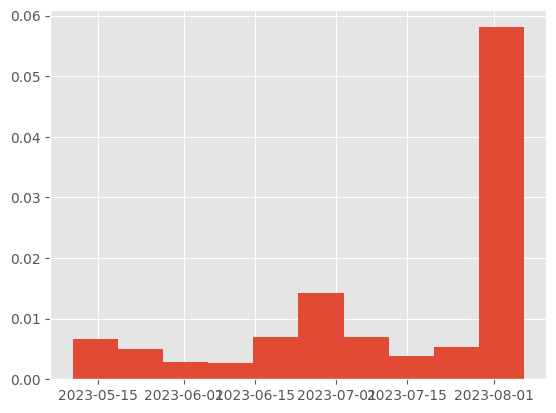

In [ ]:
_ = plt.hist(ads[ads['latest_punish_begin_date'] > '2000-01-01']['latest_punish_begin_date'], density = True)

In [ ]:
from datetime import datetime, timedelta
ads['p_date'][0] - timedelta(days=90)         #all offenses must be on/after this date which is correct

Timestamp('2023-05-09 00:00:00')

There's not much difference in the trend for different punishment counts.

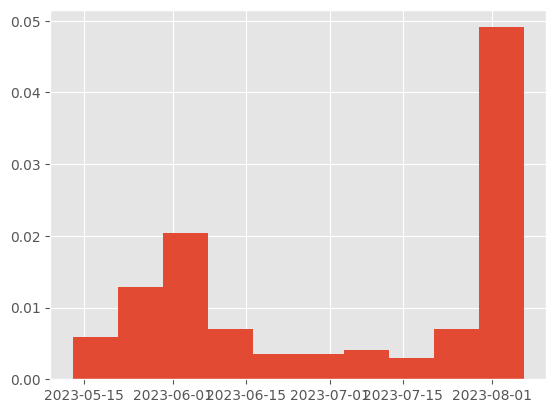

In [ ]:
_ = plt.hist(ads[(ads['latest_punish_begin_date'] > '2000-01-01') & (ads['punish_num'] >1 )]['latest_punish_begin_date'], density = True)

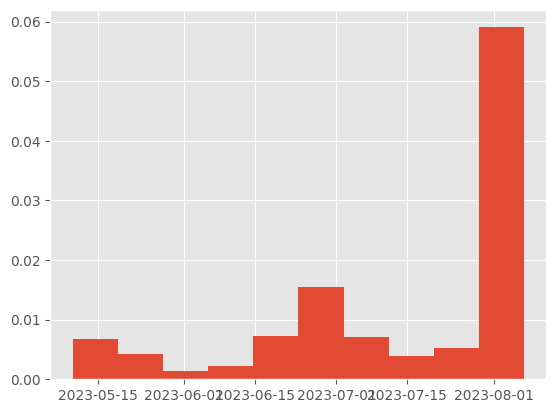

In [ ]:
_ = plt.hist(ads[(ads['latest_punish_begin_date'] > '2000-01-01') & (ads['punish_num'] == 1 )]['latest_punish_begin_date'], density = True)

#### Ad Revenue

Some ad revenue values are NA

In [ ]:
ads['ad_revenue'].isna().sum()

10771

In [ ]:
ads[ads['ad_revenue'].isna()]       ##what does NA revenue mean?? some of them have NA start time and very little or 0 ad_revenue?

,p_date,ad_id,delivery_country,queue_market,punish_num,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en
3,2023-08-07,1738303920938010,NZ,NZ,2.0,2023-07-24,NaN,5.3650,2022-07-14 05:16:00,1.58,Auction Ads,auction_relation
262,2023-08-07,1772998101648410,VN,VN,3.0,2023-08-02,NaN,2.9423,2023-08-01 03:56:00,2.13,RIE,Ad Group Recall (Merged)
288,2023-08-07,1773112965960700,US,USCA,2.0,2023-08-07,NaN,9.9047,2023-08-02 10:28:00,1.78,Auction Ads,auction_relation
411,2023-08-07,1773231382949920,BR,BR,1.0,2023-08-07,NaN,0.4337,2023-08-04 10:00:00,1.70,RIE,Ad Group Recall (Merged)
426,2023-08-07,1773312757473310,FR,FR,1.0,2023-07-27,NaN,2.7379,2023-08-04 16:23:00,1.97,Auction Ads,auction_relation
...,...,...,...,...,...,...,...,...,...,...,...,...
40674,2023-08-07,1773472206047230,VN,NaN,0.0,2000-01-01,NaN,0.0000,NaT,0.54,Non-Auction Ads,Promote
40675,2023-08-07,1773607712030720,BR,NaN,0.0,2000-01-01,NaN,0.0000,NaT,0.54,Non-Auction Ads,Promote
40676,2023-08-07,1773589699308540,BE,NaN,0.0,2000-01-01,NaN,0.0000,NaT,0.54,Non-Auction Ads,Promote
40677,2023-08-07,1773530511220730,TR,NaN,0.0,2000-01-01,NaN,0.0000,NaT,0.54,Non-Auction Ads,Promote


Most ads have a low revenue

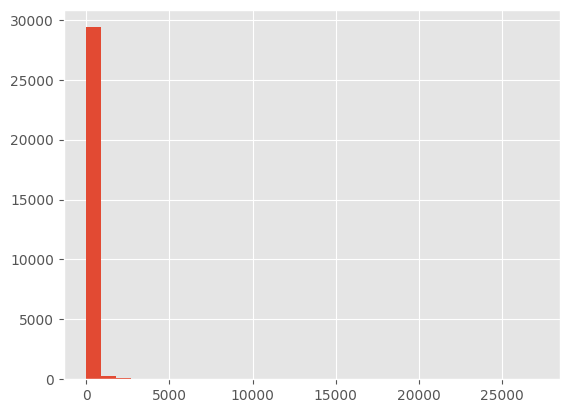

In [ ]:
_ = plt.hist(ads[ads['ad_revenue'].notna()]['ad_revenue'], bins = 30)

Only a few ads with higher revenue occur more 5000 onwards

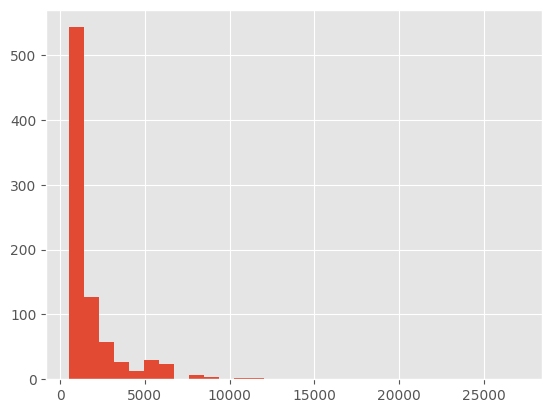

In [ ]:
_ = plt.hist(ads[(ads['ad_revenue'].notna()) & (ads['ad_revenue']>500)]['ad_revenue'], bins = 30)

#### Average Ad Revenue

Although some have NA Ad revenues, all of them have non-NA average ad revenues.

In [ ]:
ads['avg_ad_revenue'].isna().sum()

0

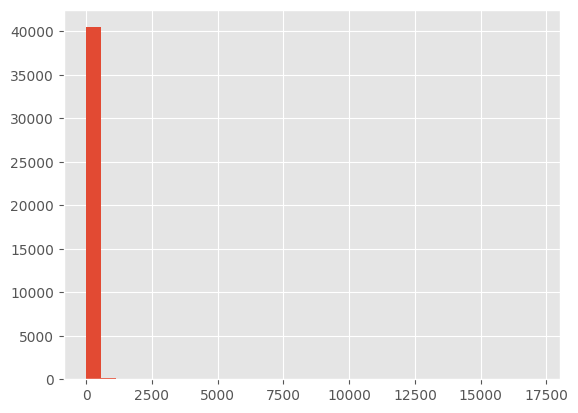

In [ ]:
_ = plt.hist(ads['avg_ad_revenue'], bins = 30)

Likewise, the average ad revenues are also mostly on the lower end, with some ads with higher revenues (however, the curve/trend is not smooth for those on higher end)

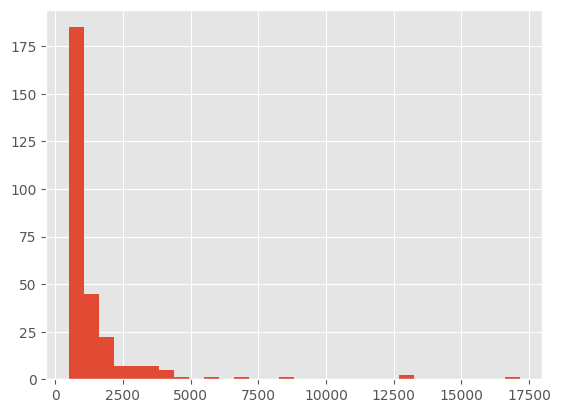

In [ ]:
_ = plt.hist(ads[ads['avg_ad_revenue']>500]['avg_ad_revenue'], bins = 30)

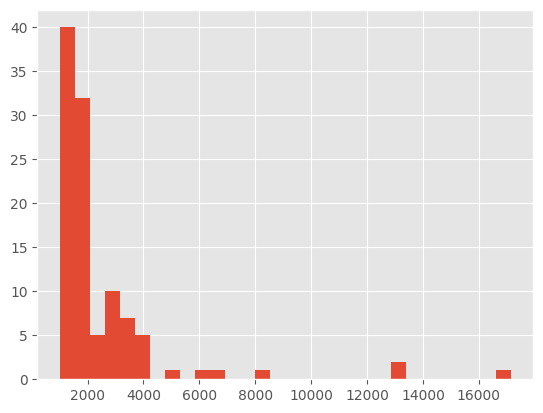

In [ ]:
_ = plt.hist(ads[ads['avg_ad_revenue']>1000]['avg_ad_revenue'], bins = 30)

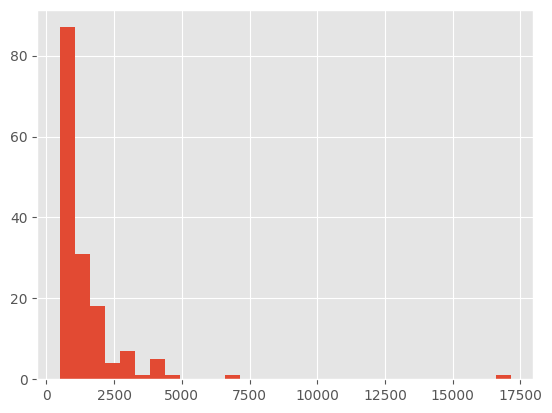

In [ ]:
_ = plt.hist(ads[(ads['avg_ad_revenue']>500) & (ads['ad_revenue']>500)]['avg_ad_revenue'], bins = 30)

These following ads with same avg_ad_revenue and ad_revenue are mostly of values 0, these are most likely first-timers.

In [52]:
ads[ads['avg_ad_revenue'] == ads['ad_revenue']]

,p_date,ad_id,delivery_country,queue_market,punish_num,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en
2533,2023-08-07,1741324547664910,HU,Other,NaN,2000-01-01,0.0,0.0,2022-08-16 14:26:00,1.62,RIE,Ad Group Recall (Merged)
2865,2023-08-07,1761993307350030,BR,BR,NaN,2000-01-01,0.0,0.0,2023-04-01 16:42:00,1.70,RIE,Ad Group Recall (Merged)
3452,2023-08-07,1768050653294640,US,USCA,NaN,2000-01-01,20.0,20.0,2023-06-07 14:27:00,1.78,Auction Ads,auction_relation
3749,2023-08-07,1768825146804250,IE,Other,NaN,2000-01-01,0.0,0.0,2023-06-16 03:35:00,1.62,RIE,Ad Group Recall (Merged)
3750,2023-08-07,1768825146804250,ES,ES,NaN,2000-01-01,0.0,0.0,2023-06-16 03:35:00,1.79,RIE,Ad Group Recall (Merged)
3751,2023-08-07,1768825146804250,GB,GB,NaN,2000-01-01,0.0,0.0,2023-06-16 03:35:00,1.72,RIE,Ad Group Recall (Merged)
3777,2023-08-07,1768876274421770,ES,ES,NaN,2000-01-01,0.0,0.0,2023-06-16 17:11:00,1.79,RIE,Ad Group Recall (Merged)
3778,2023-08-07,1768876274421770,IE,Other,NaN,2000-01-01,0.0,0.0,2023-06-16 17:11:00,1.62,RIE,Ad Group Recall (Merged)
3779,2023-08-07,1768876274421770,GB,GB,NaN,2000-01-01,0.0,0.0,2023-06-16 17:11:00,1.72,RIE,Ad Group Recall (Merged)
3781,2023-08-07,1768876473069610,GB,GB,NaN,2000-01-01,0.0,0.0,2023-06-16 17:14:00,1.72,RIE,Ad Group Recall (Merged)


However, not all avg_ad_revenue or ad_revenue with values of 0 seem to fall in the above group

In [57]:
sum(ads['avg_ad_revenue'] == 0)

644

In [59]:
sum(ads['ad_revenue'] == 0)

1491

#### Start Time                  

There are a few NA start times possibly since they are not published yet

In [ ]:
ads['start_time'].isna().sum()      #haven't posted yet?

6675

In [ ]:
ads[ads['start_time'].isna()]

,p_date,ad_id,delivery_country,queue_market,punish_num,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en
3511,2023-08-07,1773582987849730,BR,NaN,1.0,2023-08-07,NaN,12.6232,NaT,0.54,Non-Auction Ads,Promote
3526,2023-08-07,1773565701589040,BR,NaN,1.0,2023-08-07,NaN,8.9154,NaT,0.54,Non-Auction Ads,Promote
3530,2023-08-07,1773564005497860,BR,NaN,1.0,2023-08-07,NaN,3.7262,NaT,0.54,Non-Auction Ads,Promote
3531,2023-08-07,1773371474970620,SA,NaN,1.0,2023-08-07,NaN,3.4594,NaT,0.54,Non-Auction Ads,Promote
3532,2023-08-07,1773518080476160,SA,NaN,1.0,2023-08-07,NaN,3.4574,NaT,0.54,Non-Auction Ads,Promote
...,...,...,...,...,...,...,...,...,...,...,...,...
40674,2023-08-07,1773472206047230,VN,NaN,0.0,2000-01-01,NaN,0.0000,NaT,0.54,Non-Auction Ads,Promote
40675,2023-08-07,1773607712030720,BR,NaN,0.0,2000-01-01,NaN,0.0000,NaT,0.54,Non-Auction Ads,Promote
40676,2023-08-07,1773589699308540,BE,NaN,0.0,2000-01-01,NaN,0.0000,NaT,0.54,Non-Auction Ads,Promote
40677,2023-08-07,1773530511220730,TR,NaN,0.0,2000-01-01,NaN,0.0000,NaT,0.54,Non-Auction Ads,Promote


Interestingly, all ads have however have started before the publish date (p_date)

In [ ]:
ads[(ads['start_time'].isna()) & (ads['latest_punish_begin_date'] <= '2023-08-07')]

,p_date,ad_id,delivery_country,queue_market,punish_num,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en
3564,2023-08-07,1773502234104830,EG,NaN,1.0,2023-08-06,NaN,0.3671,NaT,0.54,Non-Auction Ads,Promote
3565,2023-08-07,1773502777931780,EG,NaN,1.0,2023-08-06,NaN,0.3671,NaT,0.54,Non-Auction Ads,Promote
3566,2023-08-07,1773502170108930,EG,NaN,1.0,2023-08-06,NaN,0.3671,NaT,0.54,Non-Auction Ads,Promote
3567,2023-08-07,1773483108301820,EG,NaN,1.0,2023-08-06,NaN,0.3071,NaT,0.54,Non-Auction Ads,Promote
3605,2023-08-07,1773583405689860,IT,NaN,1.0,2023-08-04,NaN,0.8974,NaT,0.54,Non-Auction Ads,Promote
...,...,...,...,...,...,...,...,...,...,...,...,...
40674,2023-08-07,1773472206047230,VN,NaN,0.0,2000-01-01,NaN,0.0000,NaT,0.54,Non-Auction Ads,Promote
40675,2023-08-07,1773607712030720,BR,NaN,0.0,2000-01-01,NaN,0.0000,NaT,0.54,Non-Auction Ads,Promote
40676,2023-08-07,1773589699308540,BE,NaN,0.0,2000-01-01,NaN,0.0000,NaT,0.54,Non-Auction Ads,Promote
40677,2023-08-07,1773530511220730,TR,NaN,0.0,2000-01-01,NaN,0.0000,NaT,0.54,Non-Auction Ads,Promote


In [61]:
ads[(ads['start_time'].isna()) & (ads['latest_punish_begin_date'] > '2023-08-07')]

,p_date,ad_id,delivery_country,queue_market,punish_num,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en


Most of the ads have start_time closest to the p_date.

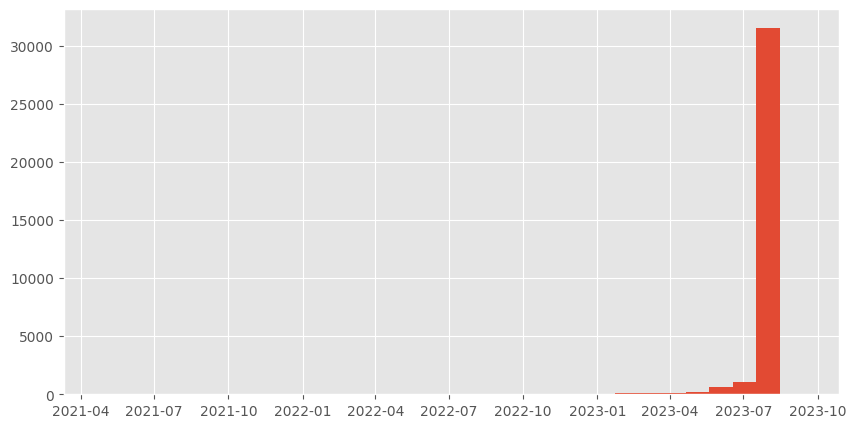

In [ ]:
plt.figure(figsize=(10, 5))
_ = plt.hist(ads[ads['start_time'].notna()]['start_time'], bins = 30)

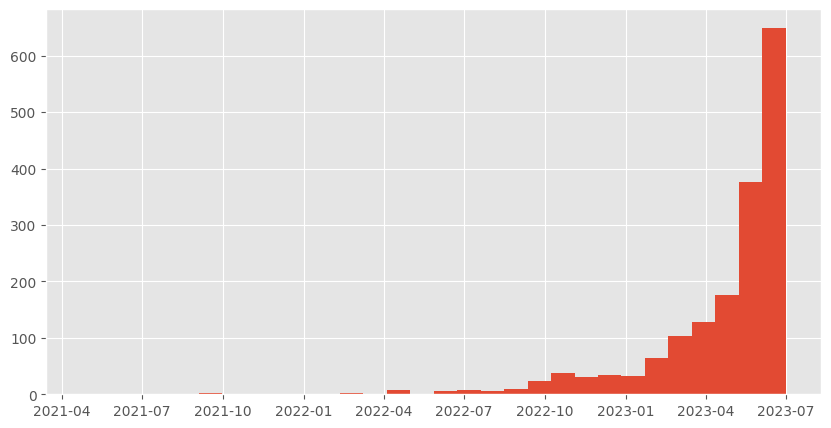

In [ ]:
plt.figure(figsize=(10, 5))
_ = plt.hist(ads[(ads['start_time'].notna()) & (ads['start_time'] < '2023-07')]['start_time'], bins = 30)

#### Baseline ST

All ads have a baseline ST

In [ ]:
ads['baseline_st'].isna().sum()

0

The distribution is not very consistent, with 2 peakes at around 0.5-0.8 and around 1.6-1.9

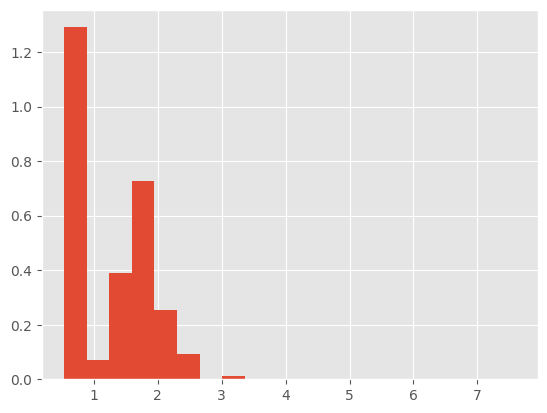

In [ ]:
_ = plt.hist(ads['baseline_st'], density = True, bins = 20)

#### Product Line

All ads have a product line in the following 4 categories.

In [ ]:
ads['product_line'].isna().sum()

0

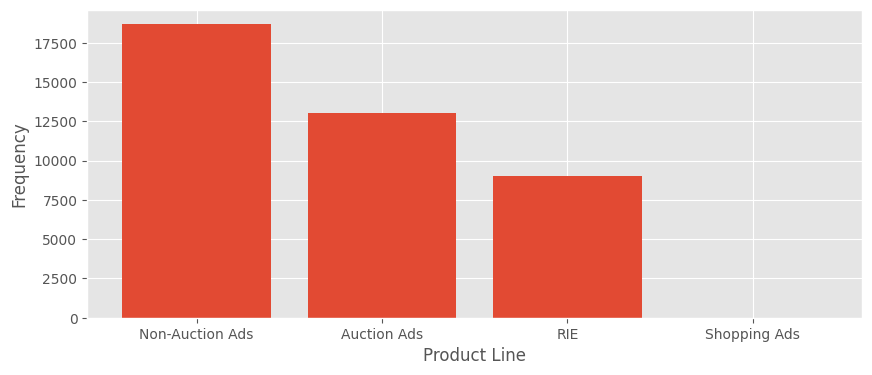

In [ ]:
prod_counts = ads['product_line'].value_counts().sort_values(ascending = False)

plt.figure(figsize=(10, 4))
plt.bar(prod_counts.index, prod_counts.values)
plt.xlabel('Product Line')
plt.ylabel('Frequency')
_ = plt.show()

In [ ]:
prod_counts['Shopping Ads']

3

#### Task Type

All ads have an assigned task types

In [ ]:
ads['task_type_en'].isna().sum()

0

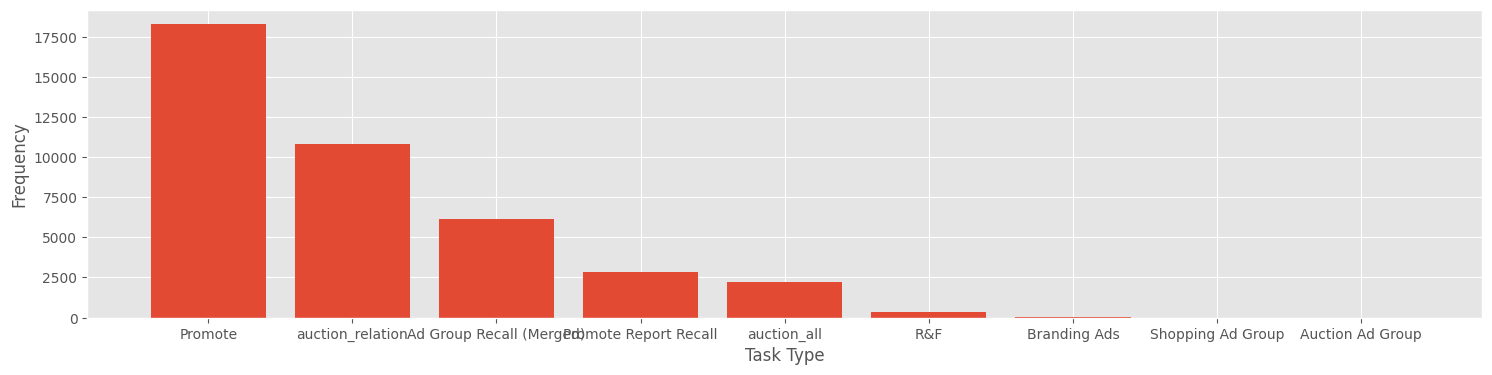

In [ ]:
task_counts = ads['task_type_en'].value_counts().sort_values(ascending = False)

plt.figure(figsize=(18, 4))
plt.bar(task_counts.index, task_counts.values)
plt.xlabel('Task Type')
plt.ylabel('Frequency')
_ = plt.show()

In [ ]:
task_counts

Promote                     18291
auction_relation            10808
Ad Group Recall (Merged)     6164
Promote Report Recall        2837
auction_all                  2197
R&F                           355
Branding Ads                   23
Shopping Ad Group               3
Auction Ad Group                1
Name: task_type_en, dtype: int64

In [ ]:
ads[ads['task_type_en'] == 'Promote']['product_line'].unique()

array(['Non-Auction Ads'], dtype=object)

In [ ]:
ads[ads['task_type_en'] == 'auction_relation']['product_line'].unique()

array(['Auction Ads'], dtype=object)

In [ ]:
ads[ads['task_type_en'] == 'Ad Group Recall (Merged)']['product_line'].unique()

array(['RIE'], dtype=object)

In [ ]:
ads[ads['task_type_en'] == 'auction_all']['product_line'].unique()

array(['Auction Ads'], dtype=object)

In [ ]:
ads[ads['task_type_en'] == 'R&F']['product_line'].unique()

array(['Non-Auction Ads'], dtype=object)

In [ ]:
ads[ads['task_type_en'] == 'Branding Ads']['product_line'].unique()

array(['Non-Auction Ads'], dtype=object)

In [ ]:
ads[ads['task_type_en'] == 'Shopping Ad Group']['product_line'].unique()

array(['Shopping Ads'], dtype=object)

In [ ]:
ads[ads['task_type_en'] == 'Auction Ad Group']['product_line'].unique()

array(['Auction Ads'], dtype=object)

All Product Line and Task Type also seem to be related in the categorization as follows:

Auction Ads Product = Auction Ad Group, auction_all, auction_relation

RIE Product = Ad Group Recall (MergeD)

Shopping Ads Product = Shopping Ad Group

All others i.e. Promote, R&F, Branding Ads = Non Auction Ads Product

### Correlation

In [63]:
import seaborn as sns

<ipython-input-68-c80a0d2d96e3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = ads.corr()


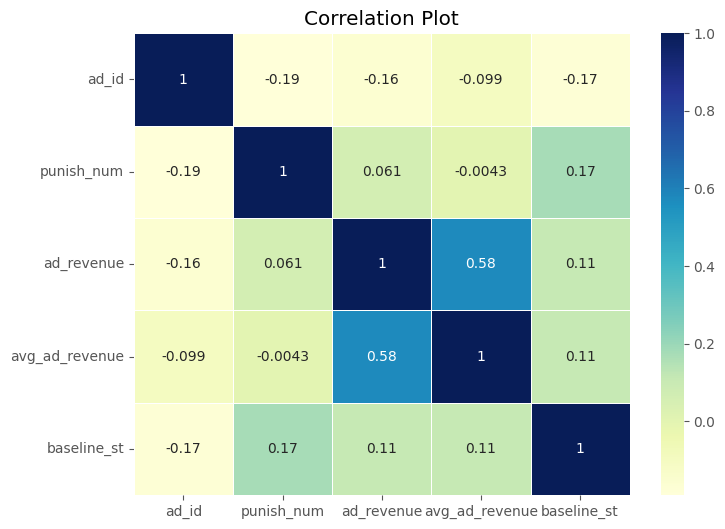

In [68]:
correlation_matrix = ads.corr()

# Create a correlation plot (heatmap)
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap = 'YlGnBu', linewidths=.5)

plt.title('Correlation Plot')
plt.show()

<ipython-input-71-b7abc1c8ddc4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = ads.dropna(subset=['ad_revenue', 'start_time']).corr()


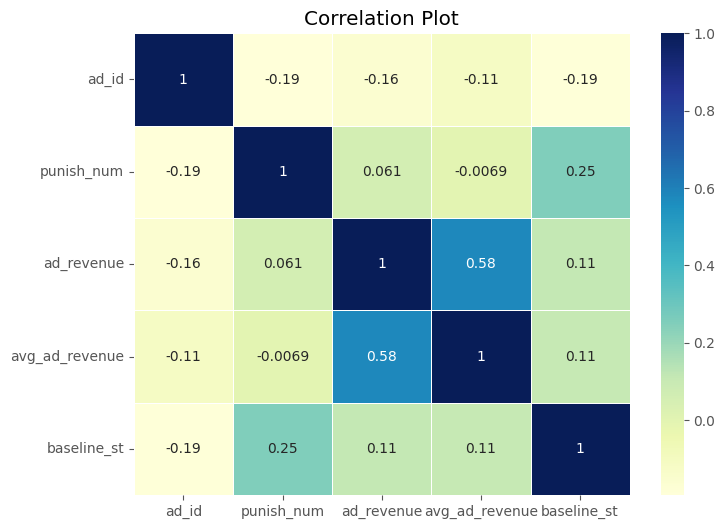

In [71]:
correlation_matrix = ads.dropna(subset=['ad_revenue', 'start_time']).corr()

# Create a correlation plot (heatmap)
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap = 'YlGnBu', linewidths=.5)

plt.title('Correlation Plot')
plt.show()

Ad revenue and avg ad revenue of course are somewhat correlated, while most have a rather weak correlation.

## Reviewers Dataset

We also take a look at the reviewers dataset

In [ ]:
rev

,moderator,market,Productivity,Utilisation %,handling time,accuracy
0,1689841547143170,"[""SA"", ""OM"", ""BH"", ""QA"", ""JO"", ""IQ"", ""KW"", ""EG...",286.217674,0.812403,123549,-
1,1686755036370945,"[""RO""]",174.560000,0.704833,25547,0.959
2,1741913197768705,"[""VN""]",334.376000,0.819167,50794,1
3,1743415203890193,"[""MX"", ""UY"", ""CL"", ""AR"", ""CO"", ""EC"", ""PE"", ""BR""]",452.277500,0.775474,89626,0.941
4,1710346282427393,"[""PH""]",612.312500,0.843229,98066,0.887
...,...,...,...,...,...,...
1409,1734911746733057,"[""US"", ""CA""]",180.750000,0.685469,79210,0.86
1410,1694737747315714,"[""TH""]",542.360000,0.890927,49664,0.958
1411,1730993346971650,"[""RO""]",320.960000,0.843042,73769,0.967
1412,1707706649725953,"[""GB""]",283.261333,0.846072,90975,0.865


In [ ]:
len(rev)

1414

### Data types

The data types of all columns are fine

In [ ]:
rev.dtypes

moderator          int64
market            object
Productivity     float64
Utilisation %    float64
handling time      int64
 accuracy         object
dtype: object

Only 2 fo the columns have NA values

In [ ]:
rev.isna().sum()

moderator          0
market             0
Productivity     129
Utilisation %    129
handling time      0
 accuracy          0
dtype: int64

### Column Checks

#### Moderators

All moderators have a unique moderator ID

In [ ]:
rev['moderator'].nunique()    #all are unique

1414

#### Market

In [75]:
rev['market']

0       ["SA", "OM", "BH", "QA", "JO", "IQ", "KW", "EG...
1                                                  ["RO"]
2                                                  ["VN"]
3        ["MX", "UY", "CL", "AR", "CO", "EC", "PE", "BR"]
4                                                  ["PH"]
                              ...                        
1409                                         ["US", "CA"]
1410                                               ["TH"]
1411                                               ["RO"]
1412                                               ["GB"]
1413                                               ["GB"]
Name: market, Length: 1414, dtype: object

We can convet the market as a list to easier access it

In [ ]:
rev["market"][0]

'["SA", "OM", "BH", "QA", "JO", "IQ", "KW", "EG", "LB"]'

In [ ]:
rev['market'] = rev['market'].apply(lambda x: eval(x))

In [ ]:
rev["market"][0]

['SA', 'OM', 'BH', 'QA', 'JO', 'IQ', 'KW', 'EG', 'LB']

In [ ]:
rev["market"][0][0]

'SA'

In [ ]:
market_counts = {}

for row in rev['market']:
    for market in row:
        # Update the counts for each element
        if market in market_counts:
          market_counts[market] += 1
        else:
          market_counts[market] = 1

In [ ]:
market_counts

{'SA': 77,
 'OM': 76,
 'BH': 73,
 'QA': 78,
 'JO': 72,
 'IQ': 66,
 'KW': 79,
 'EG': 79,
 'LB': 71,
 'RO': 21,
 'VN': 122,
 'MX': 116,
 'UY': 90,
 'CL': 114,
 'AR': 115,
 'CO': 113,
 'EC': 91,
 'PE': 114,
 'BR': 118,
 'PH': 59,
 'DK': 14,
 'TR': 34,
 'GB': 144,
 'IE': 108,
 'AU': 31,
 'NZ': 25,
 'SG': 36,
 'NO': 12,
 'IT': 25,
 'ID': 111,
 'AE': 28,
 'DZ': 20,
 'TN': 20,
 'MA': 46,
 'KZ': 17,
 'KH': 17,
 'TH': 61,
 'JP': 57,
 'NL': 26,
 'TW': 32,
 'KR': 34,
 'MY': 62,
 'SE': 22,
 'CZ': 16,
 'FR': 35,
 'UA': 15,
 'RU': 16,
 'BY': 11,
 'PL': 24,
 'GR': 18,
 'US': 161,
 'CA': 153,
 'BG': 1,
 'HU': 18,
 'LV': 3,
 'FI': 17,
 'DE': 52,
 'PK': 31,
 'ES': 27,
 'ZA': 18,
 'OTHER': 4,
 'PT': 18,
 'AT': 6,
 'CH': 6,
 'CY': 1,
 'IL': 9,
 'SI': 1,
 'ME': 4,
 'BE': 3,
 'LT': 2,
 'HR': 2,
 'UZ': 1}

In [ ]:
len(market_counts)

72

These are the market counts of all of the moderators combined

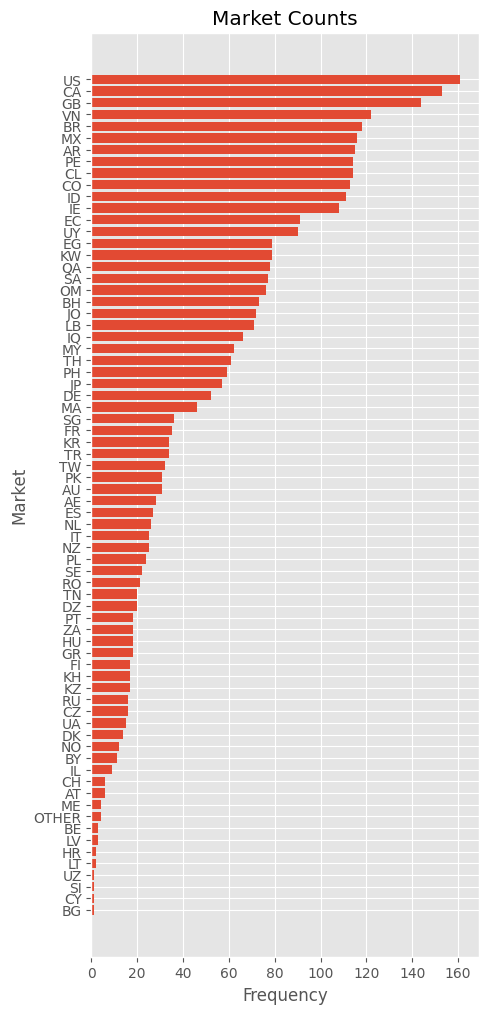

In [ ]:
sorted_market_counts = dict(sorted(market_counts.items(), key=lambda item: item[1]))

markets = list(sorted_market_counts.keys())
counts = list(sorted_market_counts.values())

plt.figure(figsize=(5, 12))
# Create a bar chart
plt.barh(markets, counts)

# Add labels and a title
plt.xlabel('Frequency')
plt.ylabel('Market')
plt.title('Market Counts')

# Show the chart
plt.show()


The advertisement markets and moderators markets do not necessarily match in their order of popularity (except for US)

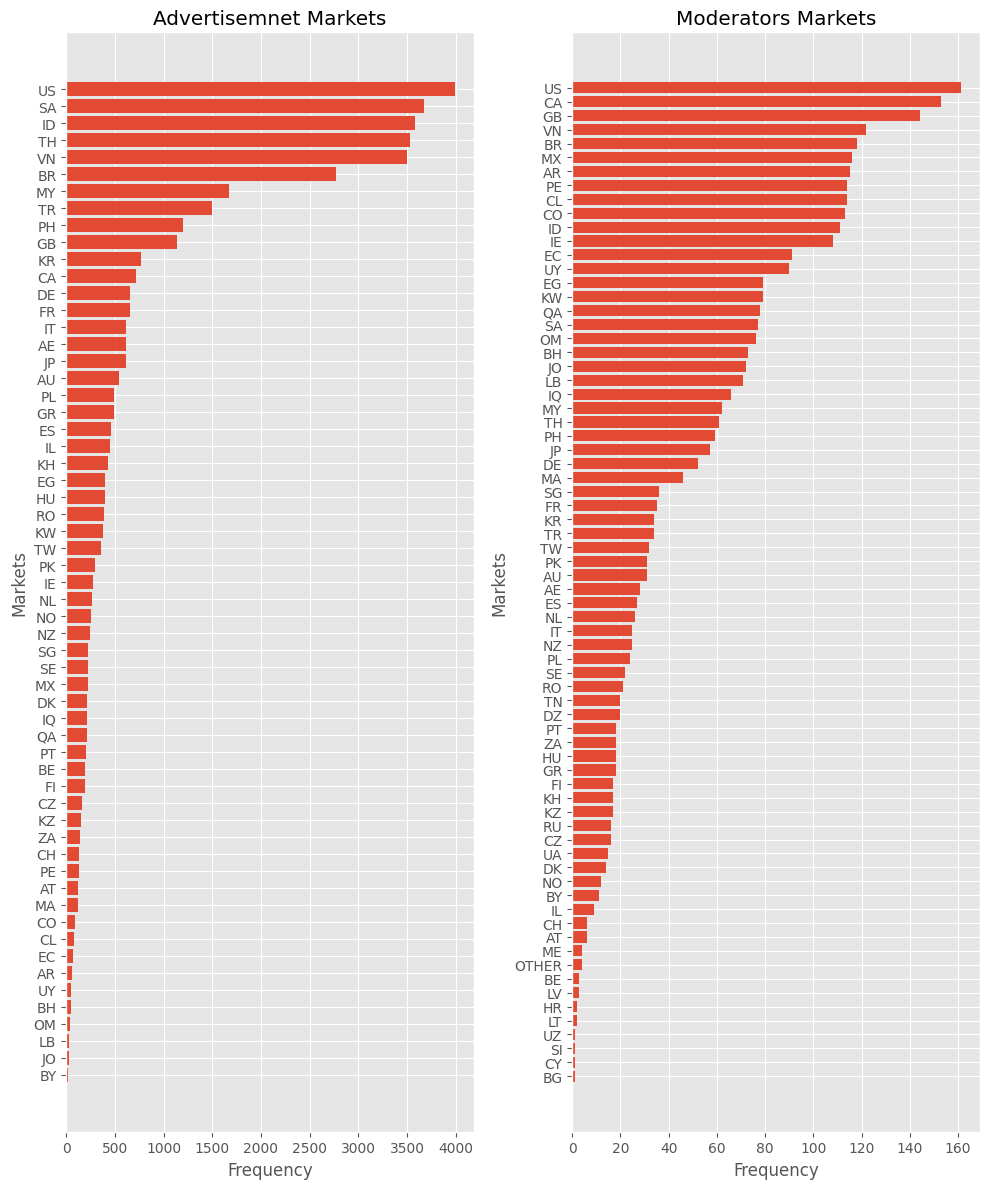

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 12))

country_counts = ads['delivery_country'].value_counts().sort_values()

ax[0].barh(country_counts.index, country_counts.values)
ax[0].set_title('Advertisemnet Markets')
ax[0].set_xlabel('Frequency')
ax[0].set_ylabel('Markets')

ax[1].barh(markets, counts)
ax[1].set_title('Moderators Markets')
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Markets')

plt.tight_layout()  # Adjust subplot layout to prevent overlapping
plt.show()

In [ ]:
set(ads['delivery_country'].unique()) - set(market_counts.keys())

set()

In [ ]:
set(market_counts.keys()) - set(ads['delivery_country'].unique())

{'BG',
 'CY',
 'DZ',
 'HR',
 'LT',
 'LV',
 'ME',
 'OTHER',
 'RU',
 'SI',
 'TN',
 'UA',
 'UZ'}

For all ad countries have, there exist a moderator with expertise/interest in that market. However, there are some moderators who do not have any ads of their interest (for this particular data i.e. day of ad review requests)

#### Productivity

Some of the productivity values are NA

In [ ]:
rev['Productivity'].isna().sum()

129

In [ ]:
rev[rev['Productivity'].isna()]

,moderator,market,Productivity,Utilisation %,handling time,accuracy
16,1312666,"[SA, OM, BH, QA, AE, DZ, JO, IQ, KW, TN, MA, L...",NaN,NaN,0,0.719
22,2735217,[VN],NaN,NaN,0,0.763
28,1671850168837125,"[SA, BH, OM, QA, JO, IQ, KW, LB, EG]",NaN,NaN,0,0.869
47,8902072,[JP],NaN,NaN,0,0.967
48,8938999,"[UA, RU, BY]",NaN,NaN,0,1
...,...,...,...,...,...,...
1391,1769313472273410,[SE],NaN,NaN,0,1
1398,1739949027608577,[PL],NaN,NaN,0,0.916
1402,1743478384979986,[FI],NaN,NaN,0,1
1404,1762882575703090,[BR],NaN,NaN,0,0.608


In [ ]:
rev[(rev['Productivity'].isna()) & (rev['handling time'] != 0)]

,moderator,market,Productivity,Utilisation %,handling time,accuracy


The productivity is NA only when the handling time is 0.

In [ ]:
rev[(rev['Productivity'].notna()) & (rev['handling time'] == 0)]

,moderator,market,Productivity,Utilisation %,handling time,accuracy


In [ ]:
rev[(rev['Productivity'].isna()) & (rev['Utilisation %'].notna())]

,moderator,market,Productivity,Utilisation %,handling time,accuracy


In [ ]:
rev[(rev['Productivity'].notna()) & (rev['Utilisation %'].isna())]

,moderator,market,Productivity,Utilisation %,handling time,accuracy


Only those with handling time 0 have NA productivity and utilization. This makes most sense in cases where the moderator may be new (?) but they have non-zero accuracy, it's best to drop them

In [76]:
rev.dropna(inplace = True)

In [ ]:
len(rev)

1285

Productivity distribution:

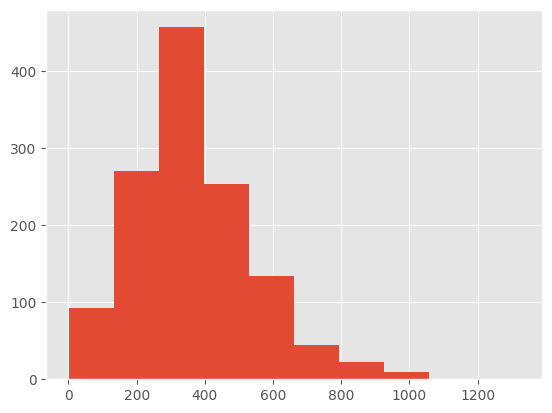

In [ ]:
_ = plt.hist(rev['Productivity'])

#### Utilization

Utilization distribution:

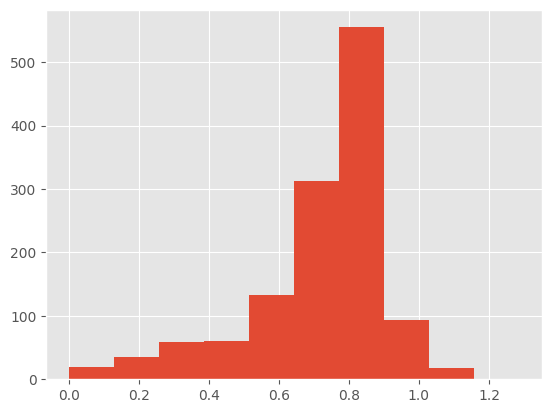

In [ ]:
_ = plt.hist(rev['Utilisation %'])

#### Handling Time

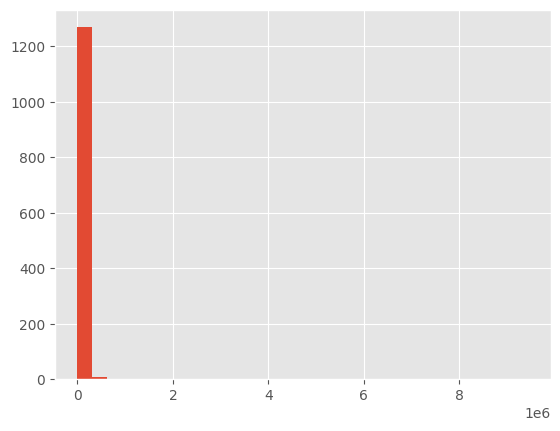

In [ ]:
_ = plt.hist(rev['handling time'], bins = 30)

Most handling time is less than 150k. Asides that, the handling time distribution is quite scatterd

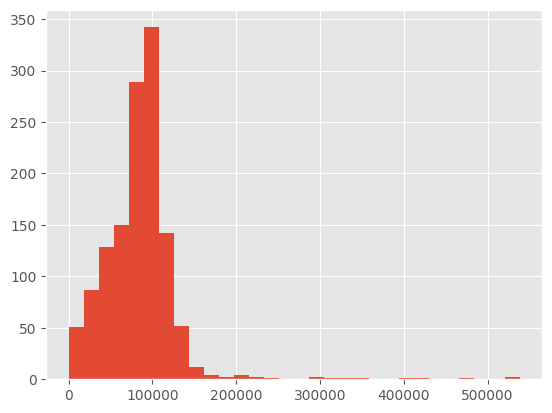

In [ ]:
_ = plt.hist(rev[rev['handling time'] < 1000000]['handling time'], bins = 30)

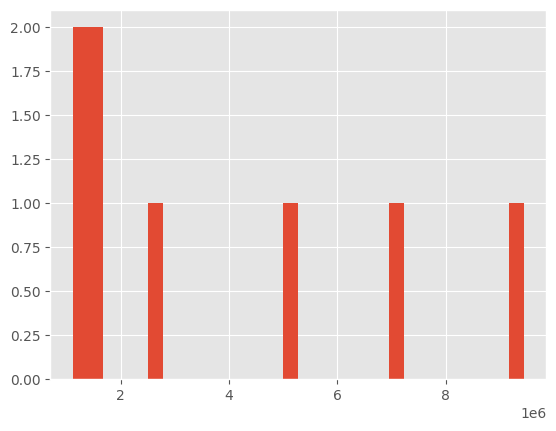

In [ ]:
_ = plt.hist(rev[rev['handling time'] > 1000000]['handling time'], bins = 30)

In [ ]:
rev[rev['handling time'] > 1000000]

,moderator,market,Productivity,Utilisation %,handling time,accuracy
395,2972398,[JP],271.932500,0.439135,1552008,0.739
501,6953937,[JP],294.082500,0.436750,1118474,0.758
659,8051836,[JP],137.717500,0.224698,5244816,0.698
762,6112073,[SE],186.845000,0.897427,7124567,0.745
885,7363167,"[SA, BH, OM, QA, AE, JO, IQ, KW, MA, EG]",254.820000,0.540042,2578531,0.5
946,2269073,[JP],111.276667,0.169951,1608180,0.724
1232,7050108,[FR],300.640000,0.209465,1339234,0.799
1312,9657819,"[GB, IE]",325.852500,0.424724,9443621,0.693


However, their productivity and/or utilization is not exceptionally high

#### Accuracy

Accuracy also has some NAs listed as - so we need to fix that

In [77]:
rev = rev.rename(columns={' accuracy ': 'accuracy'})

In [ ]:
rev['accuracy'].isna().sum()

0

In [ ]:
sum(rev['accuracy']==0)

0

In [ ]:
rev['accuracy'].unique()[0]   ##essentially NA

'                 -  '

In [ ]:
sum(rev['accuracy'] == rev['accuracy'].unique()[0])

10

In [ ]:
rev[rev['accuracy'] == rev['accuracy'].unique()[0]]       # - we can mark them NA and drop

,moderator,market,Productivity,Utilisation %,handling time,accuracy
0,1689841547143170,"[SA, OM, BH, QA, JO, IQ, KW, EG, LB]",286.217674,0.812403,123549,-
265,1694555598292994,[NL],46.386087,0.196601,29984,-
412,1761892264652818,[DE],31.433043,0.077645,48106,-
510,1005827,[BR],76.587500,0.346677,107285,-
529,2796851,[KZ],26.285000,0.634344,36862,-
892,3778633,[TR],107.352500,0.329443,42022,-
916,5581253,[DK],92.835000,0.254167,14774,-
943,9699751,[ID],194.980000,0.716911,88854,-
1283,1822136,"[GB, IE]",154.842500,0.745224,90290,-
1393,1695027913818113,[IT],147.020000,0.335302,25186,-


In [78]:
rev['accuracy'] = rev['accuracy'].replace(rev['accuracy'].unique()[0], np.nan)

In [79]:
rev['accuracy'] = pd.to_numeric(rev['accuracy'], errors='coerce').astype('float64')

Distribution of accuracy

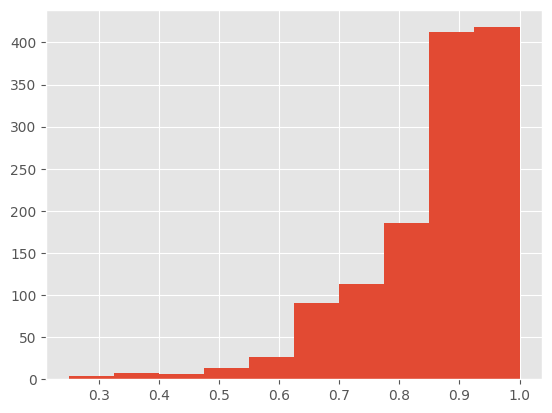

In [80]:
_ = plt.hist(rev['accuracy'])

### Correlation

<ipython-input-81-9f3d954e0639>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = rev.corr()     ##the NA values are already dropped


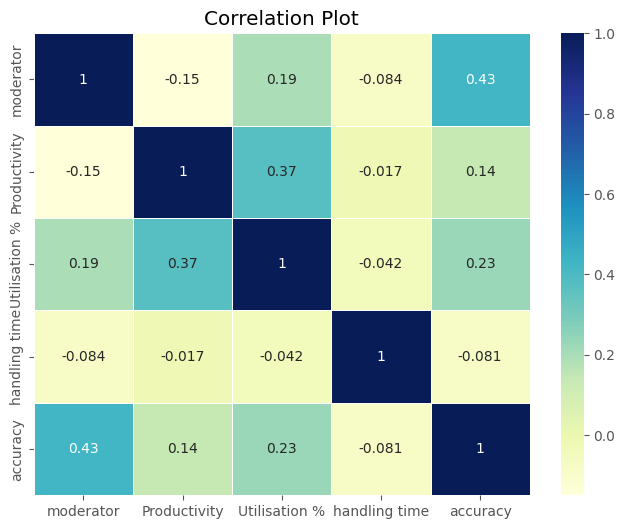

In [81]:
correlation_matrix = rev.corr()     ##the NA values are already dropped

# Create a correlation plot (heatmap)
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap = 'YlGnBu', linewidths=.5)

plt.title('Correlation Plot')
plt.show()

Moderator and accuracy have stronger correlation in comparison to rest i.e. accuracy should be something weighted more in our priority score of reviewers. Additionally, productivity and utilization also have a weak correlation (but a not as strong as should be  expected).